# Assignment 2


#### 1. 复习上课内容以及复现课程代码

在本部分，你需要在复习上课内容和课程代码后，复现课程代码。 

done. On another script.

#### 2. 回答以下理论题目

###       < 评阅点 >： 答案是否正确完整

###### 2.1 What conditions are required to make the BFS return the optimal solution ?

1. costs >= 0
2. sort the list of pathes traversed each iteration according to the desired optimality

##### 2.2 Is there a way to make DFS find the optimal solution ? (You may need to read some material about iterative DFS)

IDDFS (iterative deepening depth-first search) could find an optimal solution like BFS but with much less memory. It visits nodes in the order as DFS, but the cumulative order in which nodes are first visited is effectively breadth-first.

##### 2.3 In what conditions BFS is a better choice than DFS and vice versa ?

If optimality is required, then BFS is a better choice than DFS. If optimality is not required but storage/memory is limited, DFS is a better choice because it has lower time complexity than BFS.

##### 2.4 When can we use machine learning ?

We can use machine learning when we have a proper dataset and we wish to make predictions based on them. Machine learning is the study of how to make programs improve their performance on certain tasks form experience (Tom Mitchell, 1996). Therefore, whenever we want to accomplish some task (in principle any task involving information processing & decision making) with better performance than in a tradional way, we could think of machine learning. 

##### 2.5 What is the gradient of a function ?

the partial derivative of the function, i.e. if the function is written as f(x,y,z), then its gradient is (df/dx,df/dy,df/dz)


##### 2.6 How can we find the maximum value of a function using the information of gradient ?

If the function is convex (concave), then its minimum (maximum) can be found by setting its gradient equal to 0.

#### 3. 实践部分  寻找地铁路线

### < 评阅点 >  1: 爬虫爬取数据是否完整;  2:搜索算法是否正确

In this part, although we recommend you to use Beijing subway, you still can use the subway map of any cities that you are interested in. 

![title](img/ditu.png)

Please using the search policy to implement an agent. This agent receives two input, one is @param start station and the other is @param destination. Your agent should give the optimal route based on Beijing Subway system.

Deadline: 2019-October-27

#### Procedures

#### 1. Get data from web.  

Some tips: 

a. You might need this package: requests[https://2.python-requests.org/en/master/] to get webpages

b.You might need to use Regular Expression and Beautiful Soap package to parse the webpages

In [1]:
# 爬取北京地铁数据，此部分参考：https://blog.csdn.net/gdhy9064/article/details/90070793

import requests
import time

null = None 
city_code = 131
station_info = requests.get('http://map.baidu.com/?qt=bsi&c=%s&t=%s' % (
                    city_code, 
                    int(time.time() * 1000)
               )
)
station_info_json = eval(station_info.content) 

##### 2. Preprocessing data

Some tips:

a. Find a suitable way to save the data you get from the web. (Note: The way you use to save the data should be able to be used to create the graph that your agent is going to explore)

In [2]:
city_conn = {} # {line1: [stop1,stop2, ...],line2: [stop1,stop2, ...],...}
city_coor = {} # {stop1: (coor_x,coor_y), stop2: (coor_x,coor_y), ...}
for subway in station_info_json['content']:
    uid_name = subway['line_name']
    stops = subway['stops']
    path = []
    for stop in stops:
        if stop['name'] not in city_coor.keys():
            city_coor[stop['name']] = (stop['x'],stop['y']) 
        path.append(stop['name'])
    city_conn[uid_name] = path
    

# print(city_conn)
print(len(city_coor.keys())) # 340 stops in total
print(len(city_conn.keys())) # 47 lines in total

340
47


In [3]:
from collections import defaultdict

def build_connection(city_conn):
    conn_stop = defaultdict(list)
    conn_line = defaultdict(list)
    for line in city_conn:
        stops = city_conn[line].copy()
        while stops:
            stop = stops.pop(0)
            if len(stops) != 0:
                next_stop = stops[0]
                conn_stop[stop].append(next_stop)
                conn_line[stop].append(line)
    return conn_stop,conn_line

conn_stop,conn_line = build_connection(city_conn)  

print(conn_stop)
# print(conn_stop["西直门"]) # stops connected to stop_xx
# print(conn_line["西直门"]) # lines connecting stop_xx

defaultdict(<class 'list'>, {'西苑': ['农大南路', '圆明园', '北宫门'], '农大南路': ['马连洼', '西苑'], '马连洼': ['西北旺', '农大南路'], '西北旺': ['永丰南', '马连洼'], '永丰南': ['永丰', '西北旺'], '永丰': ['屯佃', '永丰南'], '屯佃': ['稻香湖路', '永丰'], '稻香湖路': ['温阳路', '屯佃'], '温阳路': ['北安河', '稻香湖路'], '石厂': ['小园'], '小园': ['栗园庄', '石厂'], '栗园庄': ['上岸', '小园'], '上岸': ['桥户营', '栗园庄'], '桥户营': ['四道桥', '上岸'], '四道桥': ['金安桥', '桥户营'], '大兴机场': ['大兴新城'], '大兴新城': ['草桥', '大兴机场'], '阎村东': ['紫草坞', '苏庄'], '紫草坞': ['阎村', '阎村东'], '阎村': ['星城', '紫草坞'], '星城': ['大石河东', '阎村'], '大石河东': ['马各庄', '星城'], '马各庄': ['饶乐府', '大石河东'], '饶乐府': ['房山城关', '马各庄'], '房山城关': ['燕山', '饶乐府'], '香山': ['植物园'], '植物园': ['万安', '香山'], '万安': ['茶棚', '植物园'], '茶棚': ['颐和园西门', '万安'], '颐和园西门': ['巴沟', '茶棚'], '金安桥': ['四道桥', '杨庄'], '清华东路西口': ['六道口'], '六道口': ['北沙滩', '清华东路西口'], '北沙滩': ['奥林匹克公园', '六道口'], '奥林匹克公园': ['安立路', '森林公园南门', '北沙滩', '奥体中心'], '安立路': ['大屯路东', '奥林匹克公园'], '大屯路东': ['关庄', '安立路', '北苑路北', '惠新西街北口'], '关庄': ['望京西', '大屯路东'], '望京西': ['望京', '关庄', '北苑', '芍药居'], '望京': ['望京东', '望京西', '东湖渠', '阜通'], '望京东': ['崔各庄'

C:\Users\neuro\AppData\Local\Continuum\anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


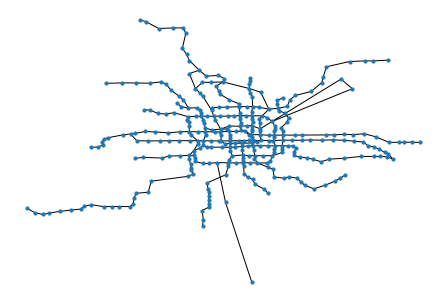

In [4]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.sans-serif'] = ['SimHei']

city_graph = nx.Graph(conn_stop)
city_graph.add_nodes_from(list(city_coor.keys()))
nx.draw(city_graph,city_coor,node_size=10,with_labels=False)

#### 3. Build the search agent

Build the search agent based ont he graph you built.

for example, if you use Beijing subway graoh, and you run:

\>>> search("奥体中心“，”天安门“）

You should get the result as follows: 奥体中心 -> A ->B ->C ... -> 天安门

In [5]:
# BFS

def search(graph,start,destination,search_strategy=lambda x:x):
    pathes = [[start]]
    visited = set()
    
    while pathes:
        path = pathes.pop(0)
        frontier = path[-1]
        if frontier in visited : continue
            
        if frontier == destination:
            return path
        
        successors = graph[frontier]

        for stop in successors:
            if stop in path: continue  # check for loop
            
            new_path = path+[stop]
            
            pathes.append(new_path)  #bfs
            
        pathes = search_strategy(pathes)
        visited.add(frontier) 
#         if pathes and (destination == pathes[0][-1]):
#             return pathes[0]  

        
path = search(conn_stop,"奥体中心","天安门西")

print(path)
print("途径 {} 站".format(len(path)-1))

['奥体中心', '北土城', '安华桥', '安德里北街', '鼓楼大街', '积水潭', '西直门', '车公庄', '阜成门', '复兴门', '西单', '天安门西']
途径 11 站


### (Optional) Improve your agent to make it able to find a path based on different strategies

###  <评阅点> : 是否正确得到不同目标下的路径。

Some ideas you might want to try:

a. Find the shortest path between two stations.

b. Find the path that requires minimum transfers between two stations.

c. Combine the previous two ideas, find a more suitable path.

Compare your results with results obtained by using some apps such as Baidu map, A map, Google map or Apple map. If there is difference, try to explanate it.

In [6]:
import numpy as np
import scipy 

def sort_by_distance(pathes):
    def get_distance_of_path(path):
        distance = 0
        for i,_ in enumerate(path[:-1]):
            distance += get_distance(path[i],path[i+1])
        return distance
    return sorted(pathes,key=get_distance_of_path,reverse=False)


def get_distance(stopA,stopB):
    posA = city_coor[stopA]
    posB = city_coor[stopB]
    X = np.array([list(posA),list(posB)])
    return scipy.spatial.distance.pdist(X)

        
path = search(conn_stop,"奥体中心","天安门西",search_strategy=sort_by_distance)

print(path)
print("途径 {} 站".format(len(path)-1))

['奥体中心', '北土城', '安华桥', '安德里北街', '鼓楼大街', '什刹海', '南锣鼓巷', '东四', '灯市口', '东单', '王府井', '天安门东', '天安门西']
途径 12 站


In [7]:
# identify the line which connects two neighbor stops 
def connect_line(stopA,stopB):
    next_stops = conn_stop[stopA]
    idx = [i for (i,s) in enumerate(next_stops) if s == stopB][0]
    con_line= conn_line[stopA][idx]
    return con_line

# find the lines traversed from the start to the end of the path
def go_through_line(path):
    lines = []
    for idx,stop in enumerate(path[:-1]):
        con_line = connect_line(stop,path[idx+1])
        lines.append(con_line)
    return lines

# number of the lines 
def count_switch(path):
    return len(list(set(go_through_line(path))))-1

def sort_by_switch(pathes):
    def count_switch(path):
        switches = len(list(set(go_through_line(path))))-1
        return switches
    return sorted(pathes,key=count_switch,reverse=False)


path = search(conn_stop,"奥体中心","天安门西",search_strategy=sort_by_switch)

print(path)
print("途径 {} 站".format(len(path)-1))

switches = count_switch(path)
print("换乘 {} 次".format(switches))

['奥体中心', '北土城', '安华桥', '安德里北街', '鼓楼大街', '积水潭', '西直门', '车公庄', '阜成门', '复兴门', '西单', '天安门西']
途径 11 站
换乘 2 次


In [8]:
# search_strategy combining the least switch and the shortest (physical) path 
# least switches as the priority; when the swtiches are tied, consider the path length

def search(graph,start,destination,search_strategy=lambda x:x,additional_ss=lambda x:x):
    pathes = [[start]]
    visited = set()
    
    while pathes:
        path = pathes.pop(0)
        frontier = path[-1]
        if frontier in visited : continue
            
        if frontier == destination:
            return path
        
        successors = graph[frontier]

        for stop in successors:
            if stop in path: continue  # check for loop
            
            new_path = path+[stop]
            
            pathes.append(new_path)  #bfs
            
        pathes = search_strategy(pathes)
        pathes = additional_ss(pathes)
        visited.add(frontier) 
        

path = search(conn_stop,"奥体中心","天安门西",search_strategy=sort_by_switch,
             additional_ss = sort_by_distance)

print(path)
print("途径 {} 站".format(len(path)-1))
print("换乘 {} 次".format(switches))

['奥体中心', '北土城', '安华桥', '安德里北街', '鼓楼大街', '什刹海', '南锣鼓巷', '东四', '灯市口', '东单', '王府井', '天安门东', '天安门西']
途径 12 站
换乘 2 次


基于BFS进行的搜索并不总能保证按照最优规则/搜索策略比如说最少换乘找到最理想的路线。最优规则是限定于已搜索的路径，而一旦到达了目的地搜索即停止，因此无法知道是否还有没搜索的路径更优（比如最少换乘）。BFS保证的最优首先是经历的节点最少。这样那些不满足这个条件且又没有先被搜索到的路径（搜索顺序按照从左到右或者alphabet所以没有优先级）就不会被考虑到，但是可能存在这样的路径虽然经历节点更多但按照其它规则（比如最少换乘）更优。

比如下面这个例子：

In [9]:
path = search(conn_stop,"国家图书馆","北土城",search_strategy=sort_by_switch)

print(path)
print("途径 {} 站".format(len(path)-1))

switches = count_switch(path)
print("换乘 {} 次".format(switches))

['国家图书馆', '动物园', '西直门', '积水潭', '鼓楼大街', '安德里北街', '安华桥', '北土城']
途径 7 站
换乘 2 次


实际上最少换乘的最优路径应该是4号线海淀黄庄转10号线，只需要换乘1站，但是总共途径9站。而按照BFS进行搜索，找到的路线西直门转2号线鼓楼大街转8号线只需要7站，但是却需要转乘两次。但是由于BFS在搜索到这条经历节点少的路径之后就停止考虑其它路径了，所以不会找到换乘更少的另一条。优先级/search strategy 只针对已搜索路径的排序，除非遍历所有可能路径/状态空间。但是这种做法非常不efficient, 所以很多算法应该是有针对这个问题的改进，比如根据实际情况加一些限制条件，在合理的一定范围内进行搜索并按照优先级排序。

## Congratulations ! You have finished the assignment of week 2.

![title](img/agent.png)

### If you have any suggestions regarding the teaching, please feel free to send them to my eamil (eric.lee.xiao@gmail.com) 

In [1]:
!pip install plotly

  Created wheel for retrying: filename=retrying-1.3.3-cp37-none-any.whl size=11435 sha256=46cce4d3c17f857e36d547303b36201a6eac4fbd7cae5cc382206dc3779582bd
  Stored in directory: C:\Users\neuro\AppData\Local\pip\Cache\wheels\d7\a9\33\acc7b709e2a35caa7d4cae442f6fe6fbf2c43f80823d46460c
Successfully built retrying


In [2]:
!pip install selenium